Connected to cmri (Python 3.9.0)

In [1]:
# This import is necessary to run the code cell-by-cell
try:
    from lab09_solution import *

    print("lab09_solution is being used")

except ImportError:
    from lab09 import *

    print("lab09 is being used")

lab09_solution is being used


In [2]:
op = Lab09_op()

train_data, test_data = op.load_data_ex1()

In [3]:
train_data_input, train_data_label = op.ex1_extract_features(train_data)
test_input, test_label = op.ex1_extract_features(test_data)

In [4]:
train_data_input, test_input = op.ex1_normalization(train_data_input, test_input)

In [5]:
train_input, train_label, val_input, val_label = op.ex1_split_train_val(train_data_input, train_data_label)

In [6]:
dataloader_train = op.ex1_gen_dataloader(train_input, train_label)
dataloader_val = op.ex1_gen_dataloader(val_input, val_label, shuffle=False)
dataloader_test = op.ex1_gen_dataloader(test_input, test_label, shuffle=False)

In [7]:
nFeatures = op.ex1_get_nFeatures(train_data_input)
nLabels = op.ex1_get_nLabels(train_data_label)
nHiddenFeatures = 100
nLayers = 3
model = op.ex1_build_model(nFeatures, nLabels, nHiddenFeatures, nLayers)

In [8]:
criterion = op.get_loss(loss_type="CrossEntropyLoss")
optim = op.get_optimizer(model, 0.001)

In [9]:
loss_train, acc_train, loss_val, acc_val = op.trainer(model, criterion, optim, dataloader_train, dataloader_val, 100)

  0%|          | 0/100 [00:00<?, ?Epoch/s]

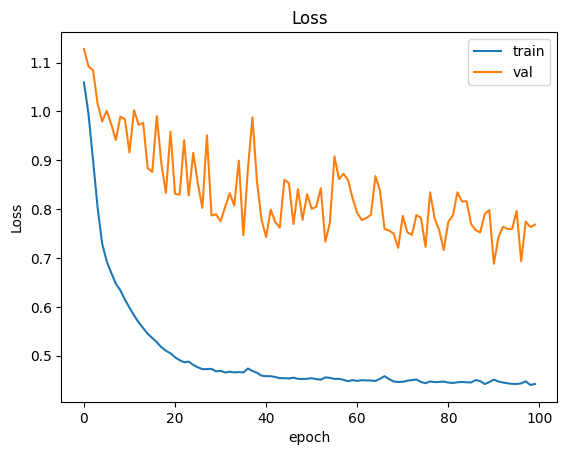

In [10]:
utils.plot([loss_train, loss_val], ["train", "val"], xlabel="epoch", ylabel="Loss", title="Loss")

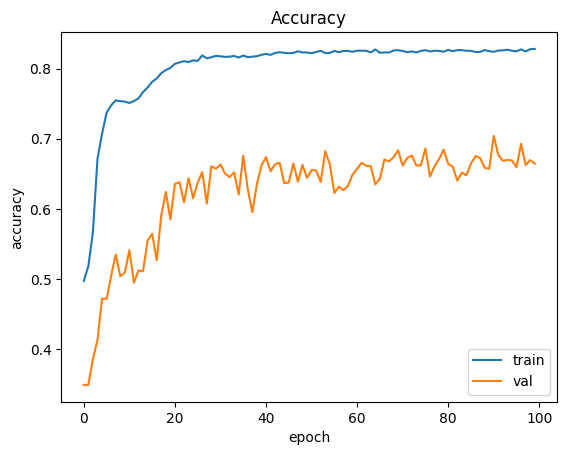

In [11]:
utils.plot([acc_train, acc_val], ["train", "val"], xlabel="epoch", ylabel="accuracy", title="Accuracy")

In [12]:
accuracy = op.ex1_tester(model, dataloader_test)
print(f"Accuracy for test data: {accuracy*100:.2f}%")

###########################################

Accuracy for test data: 83.09%


In [13]:
x_train, y_train, x_val, y_val = op.load_data_ex2()

In [14]:
dataloader_train = op.ex2_gen_dataloader(x_train, y_train, batch_size=10)
dataloader_val = op.ex2_gen_dataloader(x_val, y_val, batch_size=10, shuffle=False)

In [15]:
print("CNN5layers_FC")
print(f"The number of parameters: {sum(p.numel() for p in ex2_CNN5layers_FC().parameters() if p.requires_grad)}")
print(ex2_CNN5layers_FC())
print("==========================================")

print("CNN1layer_global_avg")
print(f"The number of parameters: {sum(p.numel() for p in ex2_CNN1layer_global_avg().parameters() if p.requires_grad)}")
print(ex2_CNN1layer_global_avg())
print("==========================================")

print("CNN5layers_global_avg")
print(
    f"The number of parameters: {sum(p.numel() for p in ex2_CNN5layers_global_avg().parameters() if p.requires_grad)}"
)
print(ex2_CNN5layers_global_avg())

CNN5layers_FC
The number of parameters: 26265
ex2_CNN5layers_FC(
  (conv1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (ReLU1): ReLU()
  (conv2): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (ReLU2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (ReLU3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (ReLU4): ReLU()
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (ReLU5): ReLU()
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=1600, out_features=16, bias=True)
  (out): Linear(in_

In [16]:
criterion = op.get_loss("BCELoss")
lr = 0.001
epochs = 300

  0%|          | 0/300 [00:00<?, ?Epoch/s]

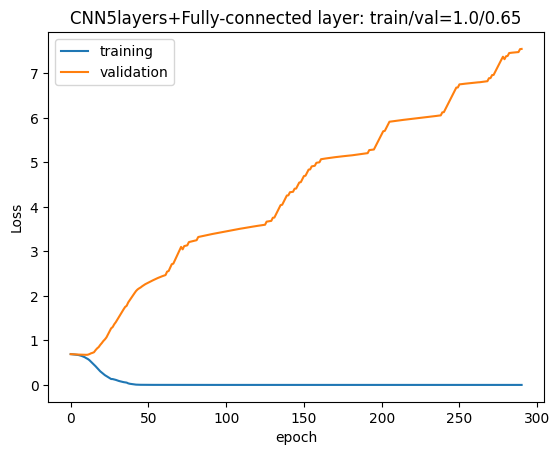

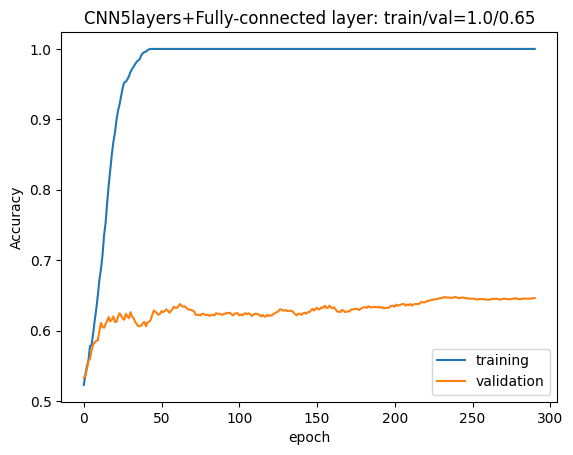

In [17]:
model = ex2_CNN5layers_FC().to(op.device)
optimizer = op.get_optimizer(model, lr)

loss_train_231, acc_train_231, loss_val_231, acc_val_231 = op.trainer(
    model, criterion, optimizer, dataloader_train, dataloader_val, epochs
)
plot_label_train_val = f"CNN5layers+Fully-connected layer: train/val={acc_train_231[-1]:.2}/{acc_val_231[-1]:.2}"

utils.plot(
    [loss_train_231, loss_val_231],
    labels=["training", "validation"],
    title=plot_label_train_val,
    xlabel="epoch",
    ylabel="Loss",
    smoothing=10,
)
utils.plot(
    [acc_train_231, acc_val_231],
    labels=["training", "validation"],
    title=plot_label_train_val,
    xlabel="epoch",
    ylabel="Accuracy",
    smoothing=10,
)

  0%|          | 0/300 [00:00<?, ?Epoch/s]

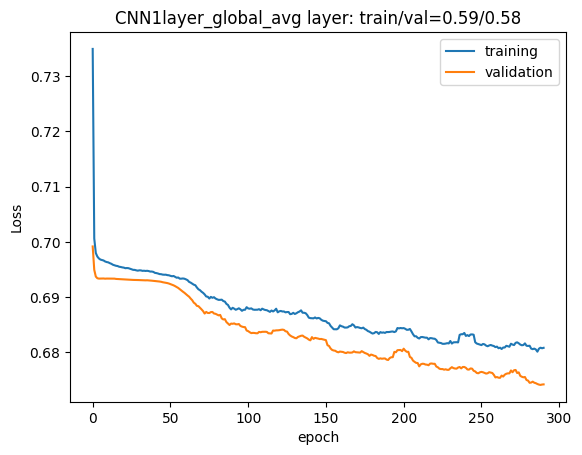

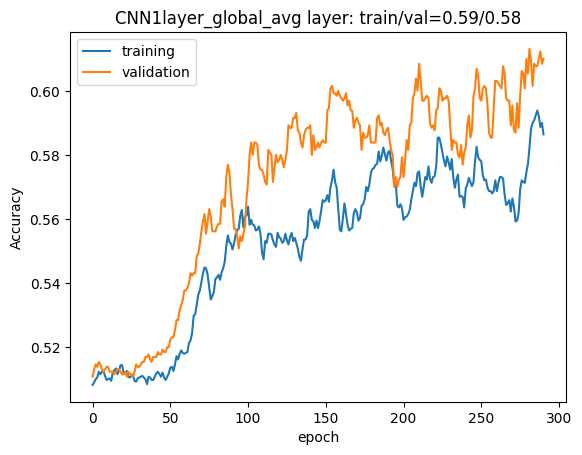

In [18]:
model = ex2_CNN1layer_global_avg().to(op.device)
optimizer = op.get_optimizer(model, lr)

loss_train_232, acc_train_232, loss_val_232, acc_val_232 = op.trainer(
    model, criterion, optimizer, dataloader_train, dataloader_val, epochs
)
plot_label_train_val = f"CNN1layer_global_avg layer: train/val={acc_train_232[-1]:.2}/{acc_val_232[-1]:.2}"

utils.plot(
    [loss_train_232, loss_val_232],
    labels=["training", "validation"],
    title=plot_label_train_val,
    xlabel="epoch",
    ylabel="Loss",
    smoothing=10,
)
utils.plot(
    [acc_train_232, acc_val_232],
    labels=["training", "validation"],
    title=plot_label_train_val,
    xlabel="epoch",
    ylabel="Accuracy",
    smoothing=10,
)

  0%|          | 0/300 [00:00<?, ?Epoch/s]

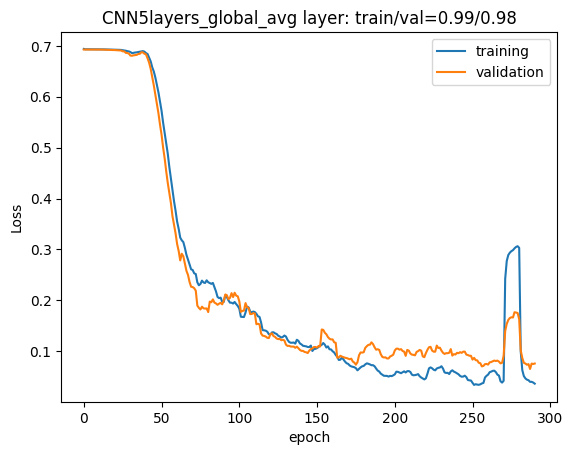

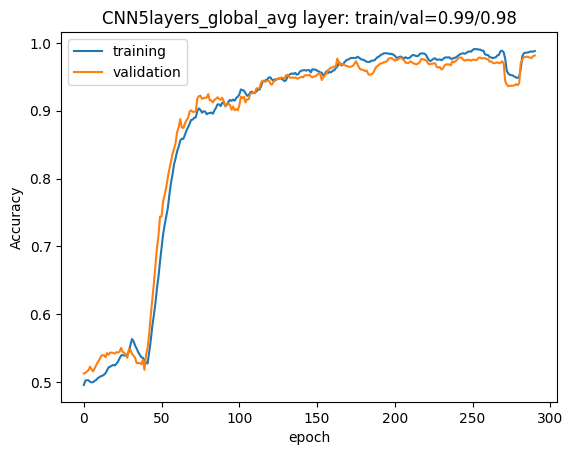

In [19]:
model = ex2_CNN5layers_global_avg().to(op.device)
optimizer = op.get_optimizer(model, lr)

loss_train_233, acc_train_233, loss_val_233, acc_val_233 = op.trainer(
    model, criterion, optimizer, dataloader_train, dataloader_val, epochs
)
plot_label_train_val = f"CNN5layers_global_avg layer: train/val={acc_train_233[-1]:.2}/{acc_val_233[-1]:.2}"

utils.plot(
    [loss_train_233, loss_val_233],
    labels=["training", "validation"],
    title=plot_label_train_val,
    xlabel="epoch",
    ylabel="Loss",
    smoothing=10,
)
utils.plot(
    [acc_train_233, acc_val_233],
    labels=["training", "validation"],
    title=plot_label_train_val,
    xlabel="epoch",
    ylabel="Accuracy",
    smoothing=10,
)